# Markov's Inequality

## The Big Question

Imagine you know that the average (expected) salary at a company is $50,000. What can you say about the proportion of employees earning more than $200,000?

**Markov's Inequality gives us a bound**, even without knowing anything else about the distribution

## What You'll Learn

1. What Markov's Inequality says (and why it's elegant)
2. The mathematical statement and proof intuition
3. Hands-on simulations to see it in action
4. Real-world applications


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42)


## 1. The Statement

**Markov's Inequality**: For any **non-negative** random variable $X$ and any $a > 0$:

$$P(X \geq a) \leq \frac{E[X]}{a}$$

In words: *The probability that X exceeds some threshold a is at most the expected value divided by that threshold.*

### Why This Matters

- **Minimal assumptions**: Only requires X ≥ 0 and knowing E[X]
- **Universal**: Works for ANY non-negative distribution
- **Upper bound**: Gives worst-case guarantees

### The Salary Example Solved

If E[Salary] = $50,000, what fraction earns more than $200,000?

$$P(\text{Salary} \geq 200{,}000) \leq \frac{50{,}000}{200{,}000} = 0.25$$

**At most 25%** of employees can earn $200,000 or more. 


## 2. Intuition: Why Does This Work?

Here's the key insight: **the average can't be low if too many values are high**.

Think about it:
- If 50% of employees earned $200,000+, the average would have to be at least $100,000
- If the average is only $50,000, there's a limit to how many high earners there can be


### Visual Intuition

Let's visualize why Markov's inequality must hold:


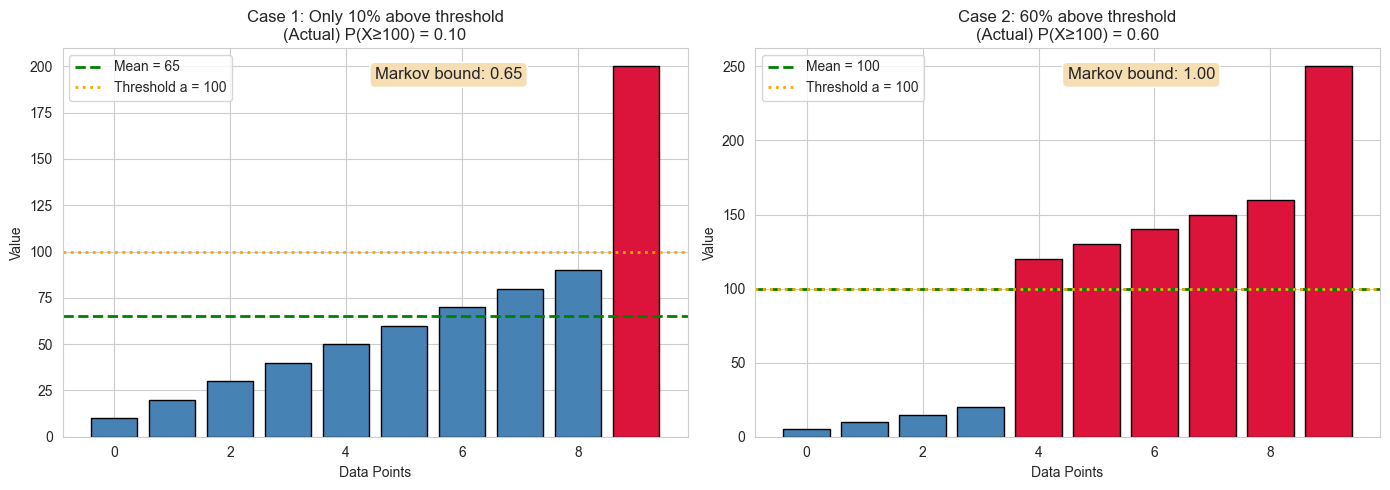


Notice: When more values are above threshold, the mean MUST be higher!
Markov's inequality captures this fundamental relationship.


In [14]:
# Visual intuition

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scenario 1: Most values below threshold
ax1 = axes[0]
values1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 200]
colors1 = ['steelblue' if v < 100 else 'crimson' for v in values1]
ax1.bar(range(len(values1)), values1, color=colors1, edgecolor='black')
ax1.axhline(y=np.mean(values1), color='green', linestyle='--', linewidth=2, label=f'Mean = {np.mean(values1):.0f}')
ax1.axhline(y=100, color='orange', linestyle=':', linewidth=2, label='Threshold a = 100')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Value')
ax1.set_title('Case 1: Only 10% above threshold\n(Actual) P(X≥100) = 0.10')
ax1.legend()

# Annotate Markov bound
markov1 = np.mean(values1) / 100
ax1.text(0.5, 0.95, f"Markov bound: {markov1:.2f}", transform=ax1.transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# Scenario 2: More values above threshold
ax2 = axes[1]
values2 = [5, 10, 15, 20, 120, 130, 140, 150, 160, 250]
colors2 = ['steelblue' if v < 100 else 'crimson' for v in values2]
ax2.bar(range(len(values2)), values2, color=colors2, edgecolor='black')
ax2.axhline(y=np.mean(values2), color='green', linestyle='--', linewidth=2, label=f'Mean = {np.mean(values2):.0f}')
ax2.axhline(y=100, color='orange', linestyle=':', linewidth=2, label='Threshold a = 100')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Value')
ax2.set_title('Case 2: 60% above threshold\n(Actual) P(X≥100) = 0.60')
ax2.legend()

# Annotate Markov bound
markov2 = np.mean(values2) / 100
ax2.text(0.5, 0.95, f"Markov bound: {markov2:.2f}", transform=ax2.transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

print("\nNotice: When more values are above threshold, the mean MUST be higher!")
print("Markov's inequality captures this fundamental relationship.")


## 3. Proof 

Here's why Markov's inequality is true. Follow along:

**Step 1**: Start with the expected value definition:
$$E[X] = \int_0^{\infty} x \cdot f(x) \, dx$$

**Step 2**: Split the integral at threshold $a$:
$$E[X] = \int_0^{a} x \cdot f(x) \, dx + \int_a^{\infty} x \cdot f(x) \, dx$$

**Step 3**: The first integral is non-negative (since X ≥ 0), so:
$$E[X] \geq \int_a^{\infty} x \cdot f(x) \, dx$$

**Step 4**: In the region $[a, \infty)$, we have $x \geq a$, so:
$$E[X] \geq \int_a^{\infty} a \cdot f(x) \, dx = a \cdot \int_a^{\infty} f(x) \, dx = a \cdot P(X \geq a)$$

**Step 5**: Rearrange:
$$P(X \geq a) \leq \frac{E[X]}{a}$$

The proof only uses the fact that X is non-negative.


## 4. Simulation: Testing Markov Across Different Distributions

Let's verify Markov's inequality holds for various distributions. We'll compare:
- The **actual probability** P(X ≥ a)
- The **Markov bound** E[X]/a

The bound should ALWAYS be ≥ the actual probability


In [15]:
def verify_markov(samples, threshold, dist_name):
    """
    Verify Markov's inequality for a given sample.
    
    Markov says: P(X ≥ a) ≤ E[X]/a
    """
    expected_value = np.mean(samples)
    markov_bound = expected_value / threshold
    actual_prob = np.mean(samples >= threshold)
    
    # Check if Markov holds
    holds = actual_prob <= markov_bound
    
    print(f"\n{dist_name}")
    print("-" * 40)
    print(f"  E[X] = {expected_value:.2f}")
    print(f"  Threshold a = {threshold}")
    print(f"  Markov bound E[X]/a = {markov_bound:.4f}")
    print(f"  Actual P(X ≥ a) = {actual_prob:.4f}")
    print(f"  Markov holds? {holds} X" if holds else f"  Markov holds? {holds} X")
    print(f"  Gap (bound - actual) = {markov_bound - actual_prob:.4f}")
    
    return expected_value, markov_bound, actual_prob


n_samples = 100_000
threshold = 10

# Test various non-negative distributions
distributions = {
    "Exponential(λ=0.5)": np.random.exponential(scale=2, size=n_samples),
    "Uniform(0, 4)": np.random.uniform(0, 4, size=n_samples),
    "Chi-squared(df=4)": np.random.chisquare(df=4, size=n_samples),
    "Poisson(λ=3)": np.random.poisson(lam=3, size=n_samples),
    "Rayleigh(σ=2)": np.random.rayleigh(scale=2, size=n_samples),
}

results = {}
for name, samples in distributions.items():
    results[name] = verify_markov(samples, threshold, name)



Exponential(λ=0.5)
----------------------------------------
  E[X] = 1.99
  Threshold a = 10
  Markov bound E[X]/a = 0.1992
  Actual P(X ≥ a) = 0.0064
  Markov holds? True X
  Gap (bound - actual) = 0.1928

Uniform(0, 4)
----------------------------------------
  E[X] = 2.01
  Threshold a = 10
  Markov bound E[X]/a = 0.2005
  Actual P(X ≥ a) = 0.0000
  Markov holds? True X
  Gap (bound - actual) = 0.2005

Chi-squared(df=4)
----------------------------------------
  E[X] = 4.01
  Threshold a = 10
  Markov bound E[X]/a = 0.4010
  Actual P(X ≥ a) = 0.0407
  Markov holds? True X
  Gap (bound - actual) = 0.3603

Poisson(λ=3)
----------------------------------------
  E[X] = 3.01
  Threshold a = 10
  Markov bound E[X]/a = 0.3005
  Actual P(X ≥ a) = 0.0011
  Markov holds? True X
  Gap (bound - actual) = 0.2994

Rayleigh(σ=2)
----------------------------------------
  E[X] = 2.51
  Threshold a = 10
  Markov bound E[X]/a = 0.2513
  Actual P(X ≥ a) = 0.0000
  Markov holds? True X
  Gap (bound -

## 5. Usecases Markov's Inequality

### Pros

1. **Quick sanity checks**: "Can more than 50% of X exceed 3× its mean?" → No, by Markov
2. **Unknown distributions**: When you only know the mean
3. **Proving other results**: Markov is the foundation for Chebyshev's inequality
4. **Worst-case bounds**: When you need guarantees, not estimates

### Limitations/Cons 

1. **Only works for non-negative X**: Negative values would break the proof
2. **Often loose**: The bound can be much larger than actual probability
3. **Threshold must exceed mean for useful bounds**: If a < E[X], bound exceeds 1


## 6. Practice Exercises

Try these to solidify your understanding:

1. **Exam scores**: Average score is 70. What's the maximum percentage of students scoring 90+?

2. **Create a distribution** where Markov's bound is exactly 0.5 (with threshold = 4 and E[X] = 2).

3. **Challenge**: Why doesn't Markov work for negative random variables? Create a counterexample.


In [16]:
# Exercise 1: Exam scores
avg_score = 70
high_score_threshold = 90

markov_bound = avg_score / high_score_threshold
print(f"Exercise 1: P(Score ≥ 90) ≤ {markov_bound:.2%}")
print(f"At most {markov_bound:.2%} of students can score 90+")


Exercise 1: P(Score ≥ 90) ≤ 77.78%
At most 77.78% of students can score 90+


In [17]:
# Exercise 2: Create distribution with exact bound
# Markov bound = E[X]/a = 2/4 = 0.5
# For tight bound: P(X = a) = 0.5, P(X = 0) = 0.5

samples = np.random.choice([0, 4], size=100_000, p=[0.5, 0.5])
print(f"Exercise 3:")
print(f"E[X] = {np.mean(samples):.2f}")
print(f"P(X ≥ 4) = {np.mean(samples >= 4):.4f}")
print(f"Markov bound = 2/4 = 0.5 ✓")


Exercise 3:
E[X] = 2.00
P(X ≥ 4) = 0.4994
Markov bound = 2/4 = 0.5 ✓


In [18]:
# Exercise 3: Why negative values break Markov

# Consider X that can be negative
samples_neg = np.array([-100, -100, -100, -100, 100])

expected_value = np.mean(samples_neg)
threshold = 50

print(f"Exercise 4: Counterexample with negative values")
print(f"\nX = [-100, -100, -100, -100, 100]")
print(f"E[X] = {expected_value}")
print(f"Markov would say: P(X ≥ 50) ≤ E[X]/50 = {expected_value}/50 = {expected_value/50}")
print(f"But this is NEGATIVE, which doesn't make sense for probability!")
print(f"Actual P(X ≥ 50) = {np.mean(samples_neg >= 50):.1f} (20%)")
print("The negative values 'hide' probability mass, breaking the inequality.")


Exercise 4: Counterexample with negative values

X = [-100, -100, -100, -100, 100]
E[X] = -60.0
Markov would say: P(X ≥ 50) ≤ E[X]/50 = -60.0/50 = -1.2
But this is NEGATIVE, which doesn't make sense for probability!
Actual P(X ≥ 50) = 0.2 (20%)
The negative values 'hide' probability mass, breaking the inequality.


## Conclusion

**Markov's Inequality** is your tool for bounding tail probabilities:

$$P(X \geq a) \leq \frac{E[X]}{a}$$

### Key Takeaways

1. **Simple yet powerful**: Only requires non-negativity and knowing the mean
2. **Universal guarantee**: Works for ANY non-negative distribution
3. **Often conservative**: The bound may be loose, but it's always valid
4. **Foundation for more**: Chebyshev's inequality builds on Markov

### When to Use

- Quick upper bounds on "extreme" probabilities
- When you don't know the full distribution
- As a building block for proofs

